# New York City Taxi & Limousine Commission (New York City TLC)

#### Overview:
Project Goal: Conduct exploratory data analysis (EDA) on NYC taxi data to understand ride patterns and build a predictive model for taxi fares.

**Part 1:** Inspect the data 
* Understand and inspect the provided taxi cab dataset and information.
* Compile summary information about the data to inform next steps.

**Part 2:** Understand the variables
* Use insights from examination of the summary data to guide deeper investigation into specific variables.

**Part 3:** Comprehensive EDA
* Statistical activities/data visualizations

### Change Log
2024_0511, S. Souto, Initial Version

### Data Sources

1. Sampled from original data: NYC.gov: "2017_Yellow_Taxi_Trip_Data.csv"

### Imports and Data Loading

In [1]:
# Import packages and libraries
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
# Notebook setup
pd.set_option('display.max_columns', None)

In [3]:
# Load dataset into dataframe, save copy
df0 = pd.read_csv('data/2017_Yellow_Taxi_Trip_Data.csv')
df1 = df0.copy()

## Part 1: Inspect the data

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

In [5]:
df1.shape

(22699, 18)

In [6]:
df1.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80
5,23345809,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36
6,37660487,2,05/03/2017 7:04:09 PM,05/03/2017 8:03:47 PM,1,12.83,1,N,79,241,1,47.5,1.0,0.5,9.86,0.0,0.3,59.16
7,69059411,2,08/15/2017 5:41:06 PM,08/15/2017 6:03:05 PM,1,2.98,1,N,237,114,1,16.0,1.0,0.5,1.78,0.0,0.3,19.58
8,8433159,2,02/04/2017 4:17:07 PM,02/04/2017 4:29:14 PM,1,1.20,1,N,234,249,2,9.0,0.0,0.5,0.00,0.0,0.3,9.80
9,95294817,1,11/10/2017 3:20:29 PM,11/10/2017 3:40:55 PM,1,1.60,1,N,239,237,1,13.0,0.0,0.5,2.75,0.0,0.3,16.55


In [7]:
df1.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


##### Dataset Composition
* There are 22699 observations and 18 features within the data.
* No null values.
* Non-numeric Dtypes to possibly be converted, if deemed required data:
    * two containing datetime data: `tpep_pickup_datetime`, `tpep_dropoff_datetime`
    * `store_and_fwd_flag`
##### Initial Observations:
- Not all variables appear to be required for prediction of fares and some can be removed.
- Datetime columns can be utilized to derive a trip duration column.
- Negative amounts from summary require further explanation, as does values not covered in data dictionary.

Data Limitations and Considerations:
- **Tolls Amount:** Accurate fare prediction might necessitate geographical data to account for toll costs.
- **Tip Amount:** The model's output requires clarification on whether to include a suggested tip amount in the predicted fare.

Data Dictionary Inconsistencies:\
Several columns exhibit data values that are not fully explained in the provided data dictionary, necessitating further clarification:

- **RateCodeID:** The presence of the value 99 lacks explanation within the dataset's metadata.
- **Extra:** While defined as miscellaneous extras and surcharges, the dictionary only specifies rush hour and overnight fees. Values such as -0.1, -0.5, and 4.5 require detailed descriptions.
- **MTA_Tax:** The inconsistent application of the MTA tax, including instances of zero and negative values, demands a clear explanation of the tax calculation methodology, especially in relation to metered rates.
- **Improvement_surcharge:** Similar to the MTA tax, the improvement surcharge shows inconsistencies in application, including zero and negative values. A comprehensive explanation of the surcharge calculation and the definition of "assessed trips" is required.

Data Anomalies and Potential Issues:
- **Toll Amount:** The presence of negative toll amounts suggests potential refund scenarios. Verification of this assumption is necessary, followed by potential removal of these records if deemed irrelevant.
- **Zero-Distance Trips:** The dataset contains numerous instances of trips recorded as having a distance of 0.0 miles. The underlying causes of these anomalies require investigation to assess their impact on model accuracy.

## Part 2: Understand the variables

Potential questions for the dataset include:

1. How far (distance) is the longest ride?
2. What is the most expensive ride?
3. What is the average fare per trip?
4. How many trips does each VendorID have?
5. What is the average amount paid to each vendor?
6. How many of each payment type is represented and what are their average tips?
7. What is the average tip amount per passenger count?
8. How many pickup and dropoff locations are there?
9. What is the average tip amount per trip?
10. What is the duration of the longest ride?

In [8]:
# Sort the data by trip distance
df1.sort_values(by=['trip_distance'],ascending=False)[['trip_distance']]

,trip_distance
9280,33.96
13861,33.92
6064,32.72
10291,31.95
29,30.83
...,...
2440,0.00
15916,0.00
1350,0.00
246,0.00


The longest ride is approximately 34 miles.  The top two trips are identical in distance.

In [9]:
df1.sort_values(by=['total_amount'], ascending=False)[['total_amount','trip_distance']]

,total_amount,trip_distance
8476,1200.29,2.60
20312,450.30,0.00
13861,258.21,33.92
12511,233.74,0.00
15474,211.80,0.00
...,...,...
11204,-5.30,0.64
14714,-5.30,0.40
17602,-5.80,0.46
20698,-5.80,0.70


The most expensive ride is $1200, which is not the trip with the longest distance.  The most expensive rides are not necessarily the longest ones.

In [10]:
# average fare per trip
df1.agg({"total_amount":["min","mean","max"]})

,total_amount
min,-120.300000
mean,16.310502
max,1200.290000


The average amount per trip is approximately $13, but there appears to be outliers/incorrect entries in the data to investigate.

In [11]:
# trips per VendorID
df1['VendorID'].value_counts()

VendorID
2    12626
1    10073
Name: count, dtype: int64

In [12]:
# Average total amount paid by vendor
df1.groupby(['VendorID']).mean(numeric_only=True)[['total_amount']]

,total_amount
VendorID,
1,16.298119
2,16.320382


Vendor 2 has a slightly higher share of the rides, but the average amount paid to each vendor per trip is roughly even.

In [13]:
#How many of each payment type is represented and what are their average tips?
df1['payment_type'].value_counts()

payment_type
1    15265
2     7267
3      121
4       46
Name: count, dtype: int64

The top two payment types are credit card (1), and cash (2).  Credit Card method of payment more than doubles those that are paid with cash.

In [14]:
# Break down cost-contributing columns (excluding taxes and tolls) per payment type
df1.groupby(["payment_type"]).agg({"fare_amount":"mean",
                                   "tip_amount":"mean",
                                   "total_amount":"mean"})

,fare_amount,tip_amount,total_amount
payment_type,,,
1,13.429748,2.7298,17.663577
2,12.213546,0.0000,13.545821
3,12.186116,0.0000,13.579669
4,9.913043,0.0000,11.238261


Tips are only given when the payment type is credit card.

In [15]:
# Filter the data for credit card payments only
credit_card = df1[df1['payment_type']==1].copy()

In [16]:
# Calculate average amounts for each passenger count (credit card payments only)
credit_card.groupby(['passenger_count']).agg({"fare_amount":["size","mean"],
                                             "tip_amount":["mean"],
                                             "total_amount":["mean"]})

fare_amount            tip_amount total_amount
                       size       mean       mean         mean
passenger_count                                               
0                        27  15.544444   2.610370    19.529630
1                     10977  13.278924   2.714681    17.483811
2                      2168  14.291813   2.829949    18.728132
3                       600  13.431667   2.726800    17.649317
4                       267  13.655431   2.607753    17.617865
5                       775  13.154839   2.762645    17.416813
6                       451  13.166297   2.643326    17.279911

For taxi rides paid by credit card:
* Most frequent rider group: The most common rider group is solo riders (passenger count of 1) with 10,977 rides. This group also has the second lowest average total amount at \\$17.48.
* Least Frequent rider group: The least common rider group is four (excluding zero-passenger trips).
* Tips do not appear to fluctuate based on the number of passengers in a ride.  

* Trip cost does not necessarily increase with rider count: The average fare amount, tip amount, and total amount do not increase as the number of riders goes up. It was assumed that taxis may charge more for additional passengers, however, it appears that the highest amounts are associated with a passenger count of two.  The average total amount for rides with 6 passengers is \\$17.28, whereas rides with 4 passengers have an average total amount of \\$17.62.

* There are amounts present when there are zero passengers.  This should be investigated to determine if data ia correct.

**Note:** It is important to note that this data only shows averages and may not represent the cost of every ride. There could be other factors that influence the final fare amount, such as distance traveled, time of day, and location.


### Sub-Conclusion

`Total_amount` reflects the final fare paid, and `trip_distance` captures the travel length, together providing a comprehensive picture for predicting taxi fares.

## Part 3: Data Preparation

### Comprehensive EDA
Drill down on revenue-specific and distance columns

#### Revenue-Specific EDA

##### **fare_amount, total_amount**

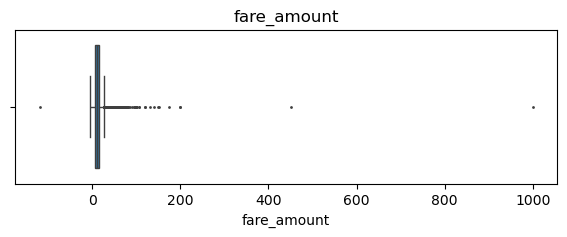

In [17]:
# Create box plot of fare_amount
plt.figure(figsize=(7,2))
plt.title('fare_amount')
sns.boxplot(x=df1['fare_amount'], fliersize=1);

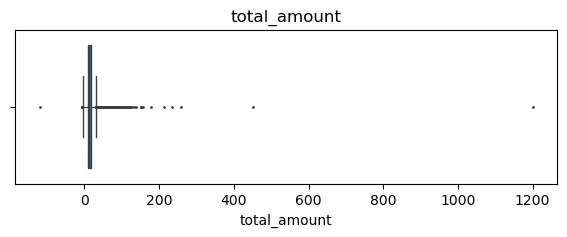

In [18]:
# Create box plot of total_amount
plt.figure(figsize=(7,2))
plt.title('total_amount')
sns.boxplot(x=df1['total_amount'], fliersize=1);

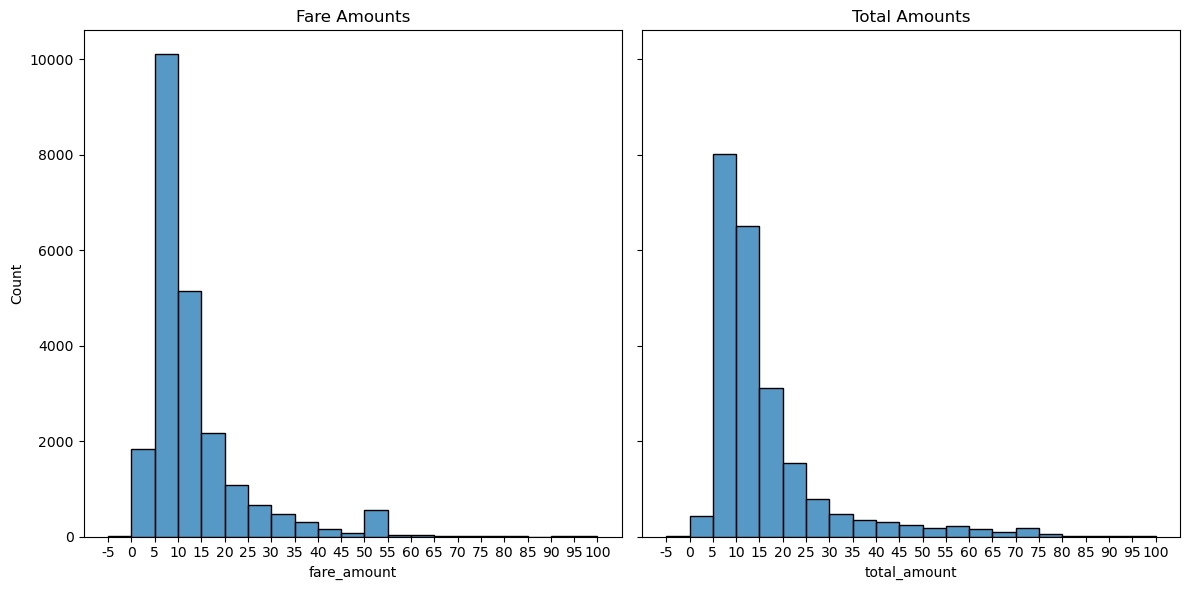

In [19]:
# Histograms of Fare and Total Amounts
# Create a 1x2 plot figure.
fig, axes = plt.subplots(1, 2, figsize = (12,6), sharey=True)

# Set the title of the plots.
axes[0].set_title("Fare Amounts")
axes[1].set_title("Total Amounts")

# Plot fare_amount
ax0 = sns.histplot(df1['fare_amount'], bins=range(-5, 101, 5), ax=axes[0])
ax0.set_xticks(range(-5, 101, 5))
ax0.set_xticklabels(range(-5, 101, 5))

# Plot total_amount
ax1 = sns.histplot(df1['total_amount'], bins=range(-5, 101, 5), ax=axes[1])
ax1.set_xticks(range(-5, 101, 5))
ax1.set_xticklabels(range(-5, 101, 5))

# Add space between plots for a cleaner appearance
plt.tight_layout()

plt.show()

Taxi fares exhibit a right-skewed distribution, with the majority of trips concentrated between \\$5 and \\$15.

##### **tip_amount**

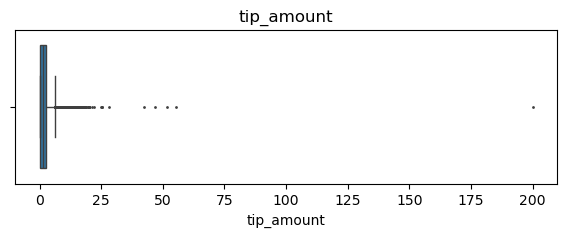

In [20]:
# Create box plot of tip_amount
plt.figure(figsize=(7,2))
plt.title('tip_amount')
sns.boxplot(x=df1['tip_amount'], fliersize=1);

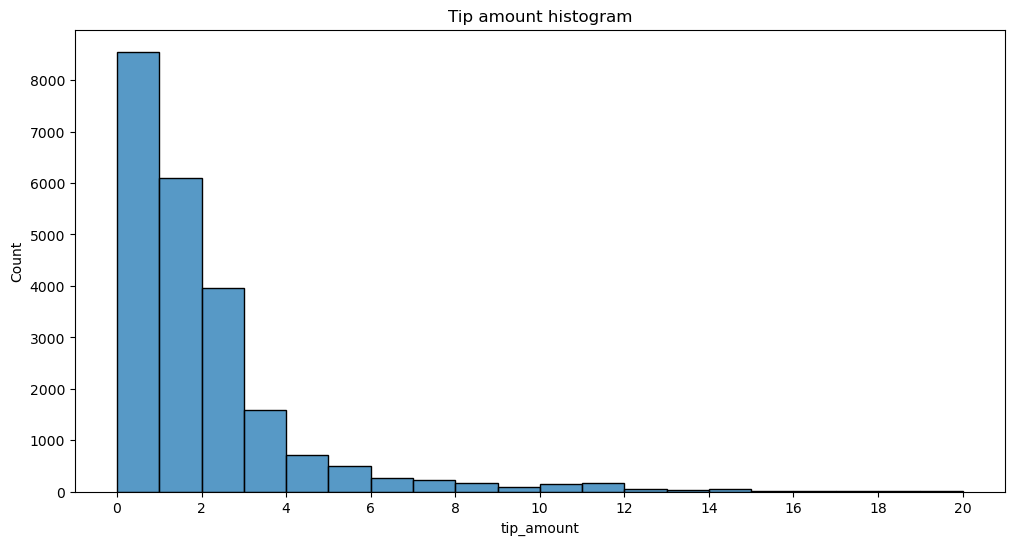

In [21]:
# Create histogram of tip_amount
plt.figure(figsize=(12, 6))
ax = sns.histplot(df1['tip_amount'], bins=range(0, 21, 1))
ax.set_xticks(range(0, 21, 2))
ax.set_xticklabels(range(0, 21, 2))
plt.title('Tip amount histogram');

Tip amounts exhibit a right-skewed distribution, with the majority of tips concentrated between \\$0 and \\$3.

###### tip_amount by vendor

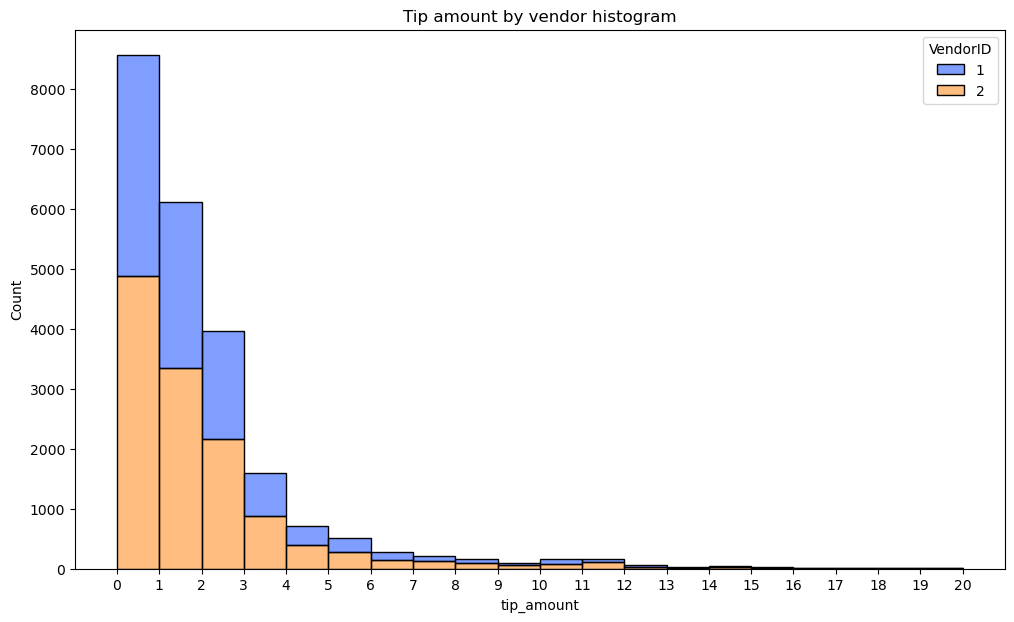

In [22]:
# Create histogram of tip_amount by vendor
plt.figure(figsize=(12,7))
ax = sns.histplot(data=df1, x='tip_amount', bins=range(0,21,1), 
                  hue='VendorID', 
                  multiple='stack',
                  palette='bright',
                 alpha=0.5)
ax.set_xticks(range(0,21,1))
ax.set_xticklabels(range(0,21,1))
plt.title('Tip amount by vendor histogram');

Vendor breakdown of tip amounts reveals a consistent tipping pattern across both vendors. Although Vendor Two has a larger portion of the rides, the distribution of tip amounts remains similar for both companies.

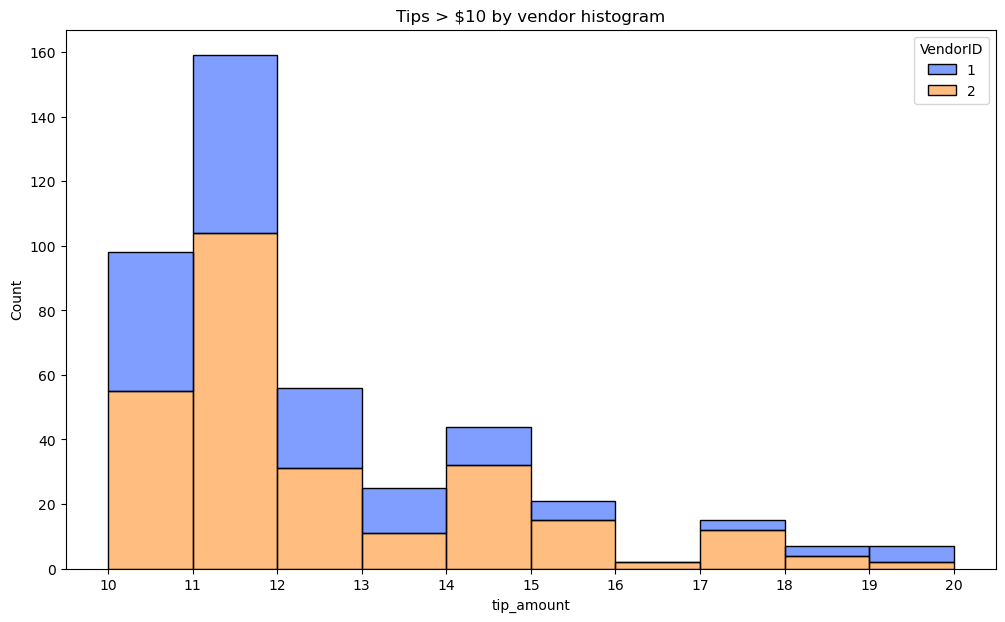

In [23]:
# Create histogram of tip_amount by vendor for tips > $10 
tips_gtr_ten = df1[df1['tip_amount'] > 10]
plt.figure(figsize=(12,7))
ax = sns.histplot(data=tips_gtr_ten, x='tip_amount', bins=range(10,21,1), 
                  hue='VendorID', 
                  multiple='stack',
                  palette='bright',
                 alpha=0.5)
ax.set_xticks(range(10,21,1))
ax.set_xticklabels(range(10,21,1))
plt.title('Tips > $10 by vendor histogram');

While focusing on higher tip amounts, we look to see if Vendor One receives a significantly larger share of these more generous tips. Interestingly, the distribution of tip amounts remains consistent across vendors, even at these extremes. However, due to the limited number of rides with very high tips, this slight difference at the very top end isn't likely to be statistically significant.

Previously, we analyzed average tips for credit card transactions only, since those were the only fares with recorded tips. In this section, we'll expand our scope to examine average tip amounts across all payment types.

In [24]:
# Calculate mean tips by passenger_count
mean_tips_by_passenger_count_all = df1.groupby(['passenger_count']).mean(numeric_only=True)[['tip_amount']]
mean_tips_by_passenger_count_all

,tip_amount
passenger_count,
0,2.135758
1,1.848920
2,1.856378
3,1.716768
4,1.530264
5,1.873185
6,1.720260


In [25]:
# Calculate mean tips by passenger_count, credit-card payments only
mean_tips_by_passenger_count_cc = credit_card.groupby(['passenger_count']).mean(numeric_only=True)[['tip_amount']]
mean_tips_by_passenger_count_cc

,tip_amount
passenger_count,
0,2.610370
1,2.714681
2,2.829949
3,2.726800
4,2.607753
5,2.762645
6,2.643326


###### Visualize tips amongst payment types

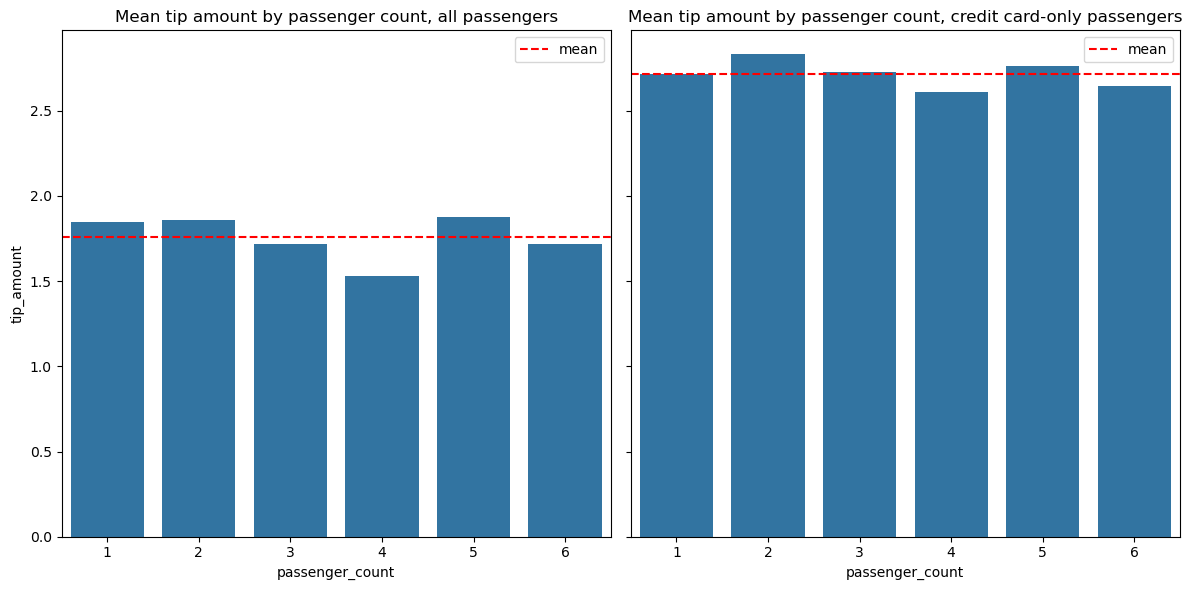

In [26]:
# Get Data
# mean tips by passenger count
data = mean_tips_by_passenger_count_all.tail(-1)
ranked_data = data.sort_values(by='tip_amount', ascending=False)

# mean tips by passenger count, credit card only
data_cc = mean_tips_by_passenger_count_cc.tail(-1)
ranked_data_cc = data_cc.sort_values(by='tip_amount', ascending=False)

# Create a 1x2 plot figure.
fig, axes = plt.subplots(1, 2, figsize = (12,6), sharey=True)

# Set the title of the plots.
axes[0].set_title("Mean tip amount by passenger count, all passengers")
axes[1].set_title("Mean tip amount by passenger count, credit card-only passengers")

# Barplot of all customers
ax0 = sns.barplot(x=ranked_data.index, y='tip_amount', data=ranked_data, ax=axes[0])
axes[0].axhline(ranked_data['tip_amount'].mean(), ls='--', color='red', label='mean')
axes[0].legend()

# Barplot for credit card-only customers
ax1 = sns.barplot(x=ranked_data_cc.index, y='tip_amount', data=ranked_data_cc, ax=axes[1])
ax1.axhline(ranked_data_cc['tip_amount'].mean(), ls='--', color='red', label='mean')
ax1.legend()

# Add space between plots for a cleaner appearance
plt.tight_layout()

plt.show()

As previously mentioned, tip information is only accessible for credit card transactions. To understand the impact of this limitation, we'll compare credit card transactions to the entire dataset, which primarily consists of card and cash payments. This comparison highlights that credit card users provide higher average tips, an expected outcome given the absence of tip data for cash fares. However, the disparity underscores the potential reduction in overall driver income when considering averages.

The average tip amount remains relatively consistent across different passenger counts. While there's a noticeable dip in tips for four-passenger trips, this is likely due to the limited number of such rides in the data (excluding empty trips).                                                                      

One potential explanation for the cash payment/tip discrepancy is that cash transactions might allow for unreported tips. However, it’s improbable that absolutely no tip information exists for cash payments. To clarify this issue, further investigation into the possibility of accessing cash tip data is warranted.

Ride Count Trends

In [27]:
# Convert string date columns to datetime
df1['tpep_pickup_datetime'] = pd.to_datetime(df1['tpep_pickup_datetime'])
df1['tpep_dropoff_datetime'] = pd.to_datetime(df1['tpep_dropoff_datetime'])

In [28]:
# Create a month column
df1['month'] = df1['tpep_pickup_datetime'].dt.month_name()

# Create a day column
df1['day'] = df1['tpep_pickup_datetime'].dt.day_name()

In [29]:
# Get total number of rides for each month
monthly_rides = df1['month'].value_counts()
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
         'August', 'September', 'October', 'November', 'December']
monthly_rides = monthly_rides.reindex(index=month_order)
monthly_rides.sort_values(ascending=False)

month
March        2049
October      2027
April        2019
May          2013
January      1997
June         1964
December     1863
November     1843
February     1769
September    1734
August       1724
July         1697
Name: count, dtype: int64

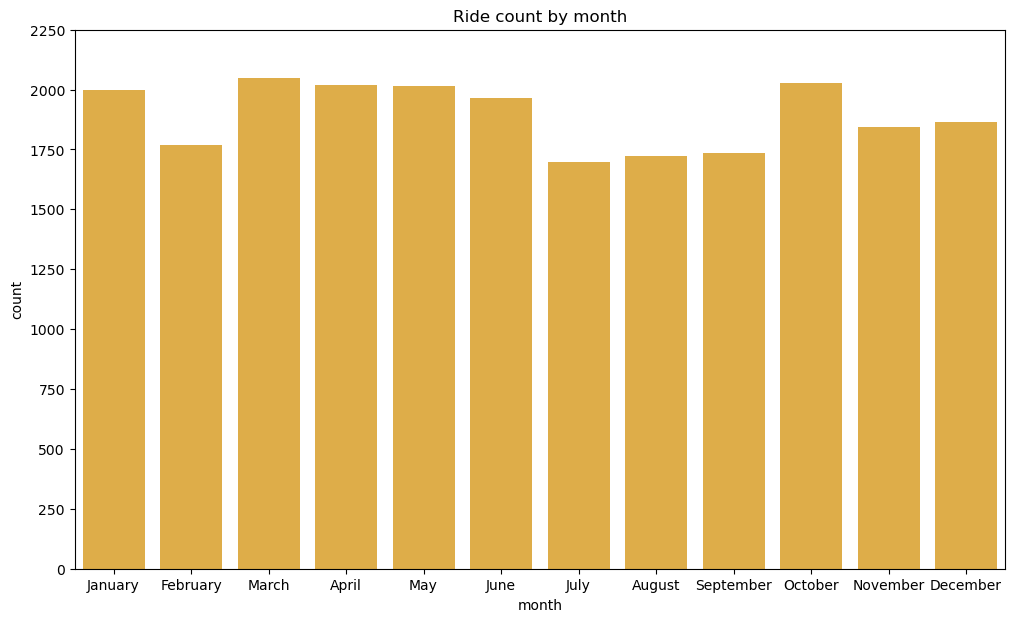

In [30]:
# Create a bar plot of total rides per month
plt.figure(figsize=(12,7))
ax = sns.barplot(x=monthly_rides.index, y=monthly_rides, color='#f7b630')
ax.set_xticks(ax.get_xticks())
ax.set_yticks(ax.get_yticks())
ax.set_xticklabels(month_order)

plt.title('Ride count by month');

Monthly ride numbers are consistent, with seasonal declines in summer and February.

In [31]:
# Get total number of rides for each day
daily_rides = df1['day'].value_counts()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_rides = daily_rides.reindex(index=day_order)
daily_rides.sort_values(ascending=False)

day
Friday       3413
Thursday     3402
Wednesday    3390
Saturday     3367
Tuesday      3198
Sunday       2998
Monday       2931
Name: count, dtype: int64

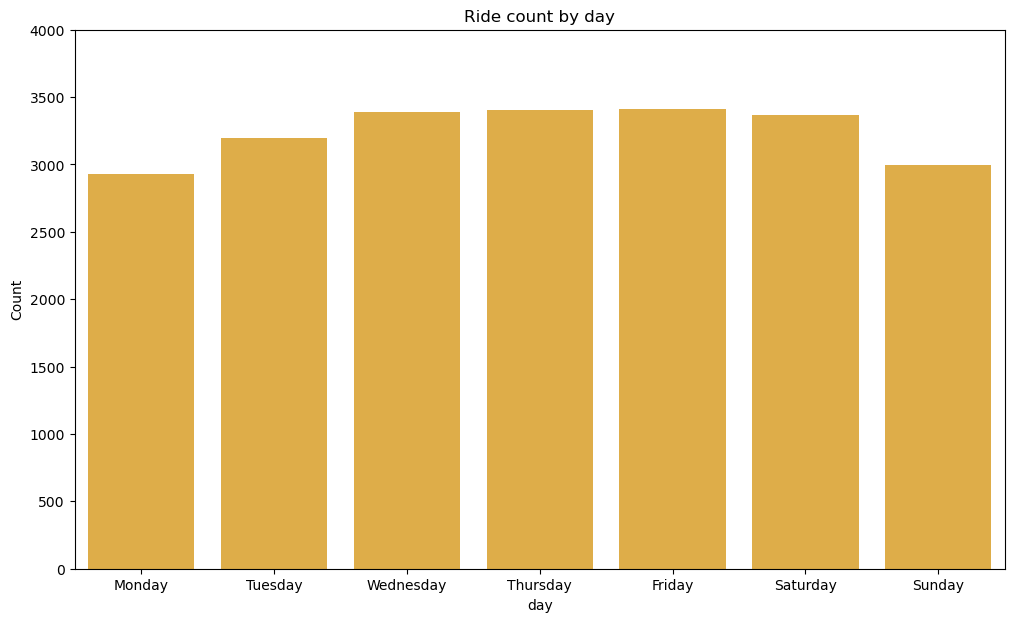

In [32]:
# Create bar plot for ride count by day
plt.figure(figsize=(12,7))
ax = sns.barplot(x=daily_rides.index, y=daily_rides, color='#f7b630')
ax.set_xticks(ax.get_xticks())
ax.set_yticks(ax.get_yticks())
ax.set_xticklabels(day_order)
ax.set_ylabel('Count')
plt.title('Ride count by day');

Taxi usage was higher on weekdays, particularly from Wednesday to Saturday.

Revenue Trends

In [33]:
# get revenue by day
total_amount_day = df1.groupby('day').sum(numeric_only=True)[['total_amount']]
total_amount_day = total_amount_day.reindex(index=day_order)
total_amount_day.sort_values(by='total_amount', ascending=False)

,total_amount
day,
Thursday,57181.91
Friday,55818.74
Wednesday,55310.47
Tuesday,52527.14
Saturday,51195.40
Monday,49574.37
Sunday,48624.06


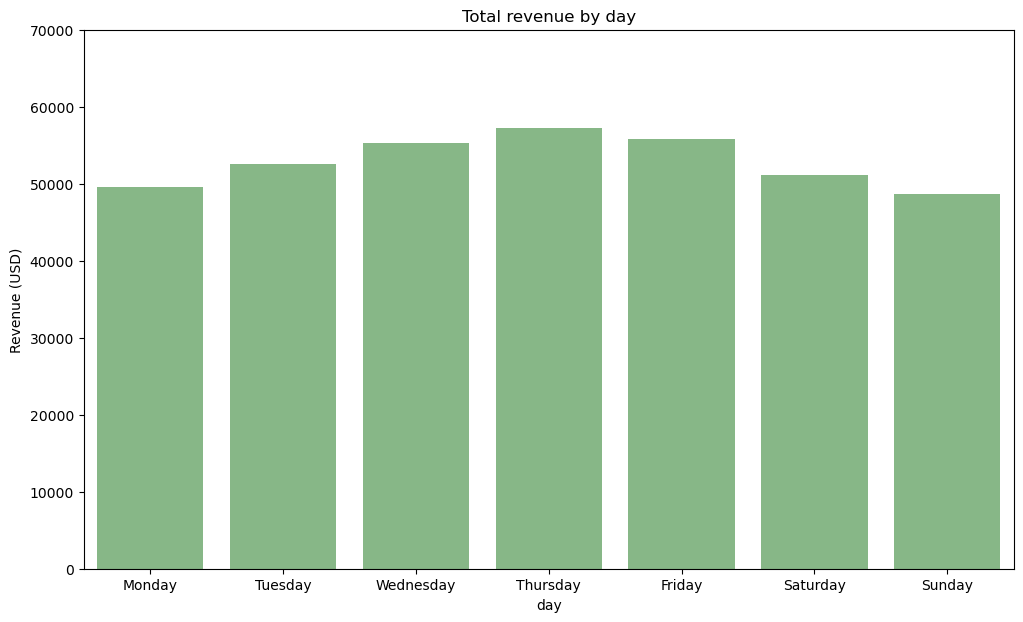

In [34]:
plt.figure(figsize=(12,7))
ax = sns.barplot(x=total_amount_day.index, y=total_amount_day['total_amount'], color = 'green', alpha=0.5)
ax.set_xticks(ax.get_xticks())
ax.set_yticks(ax.get_yticks())
ax.set_xticklabels(day_order)
ax.set_ylabel('Revenue (USD)')
plt.title('Total revenue by day');

Thursdays were the most lucrative day for the taxi service, generating the highest gross revenue. Sunday and Monday brought in the least income. It's worth noting that while Saturday had a similar number of rides to Thursday, its revenue was significantly lower, dropping over 10% despite only 35 fewer passengers.

In [35]:
# Get total revenue by month
total_amount_month = df1.groupby('month').sum(numeric_only=True)[['total_amount']]
total_amount_month = total_amount_month.reindex(index=month_order)
total_amount_month.sort_values(by='total_amount', ascending=False)

,total_amount
month,
May,33828.58
March,33085.89
October,33065.83
June,32920.52
April,32012.54
January,31735.25
December,31261.57
November,30800.44
February,28937.89


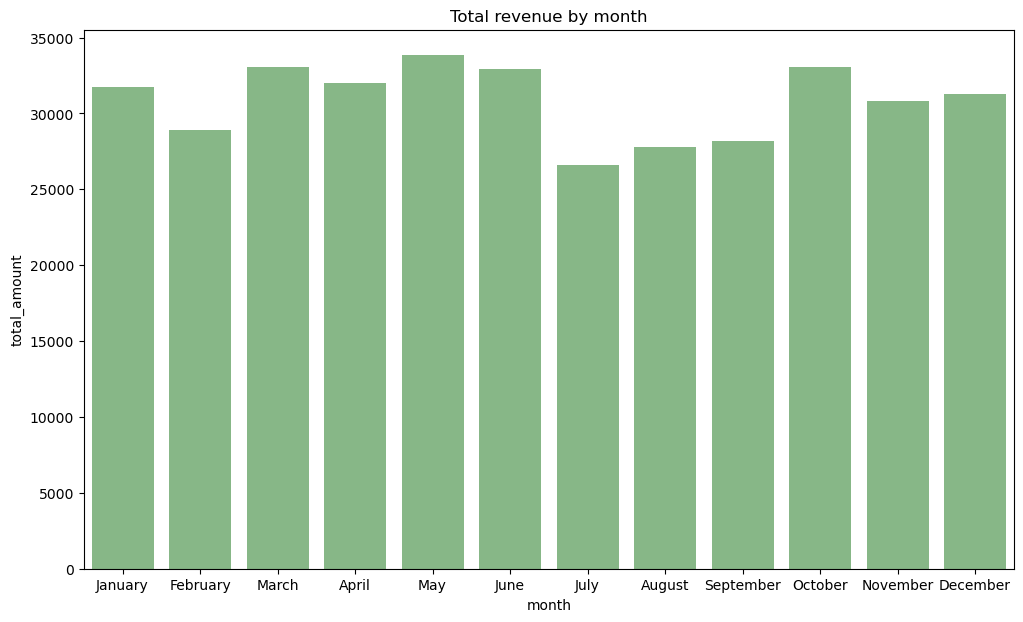

In [36]:
# Create a bar plot of total revenue by month
plt.figure(figsize=(12,7))
ax = sns.barplot(x=total_amount_month.index, y=total_amount_month['total_amount'], color = 'green', alpha=0.5)
plt.title('Total revenue by month');

Similar to the monthly ride count, revenue exhibits a recurring pattern, experiencing notable declines in July, August, September, and February. 

#### Distance-Specific EDA

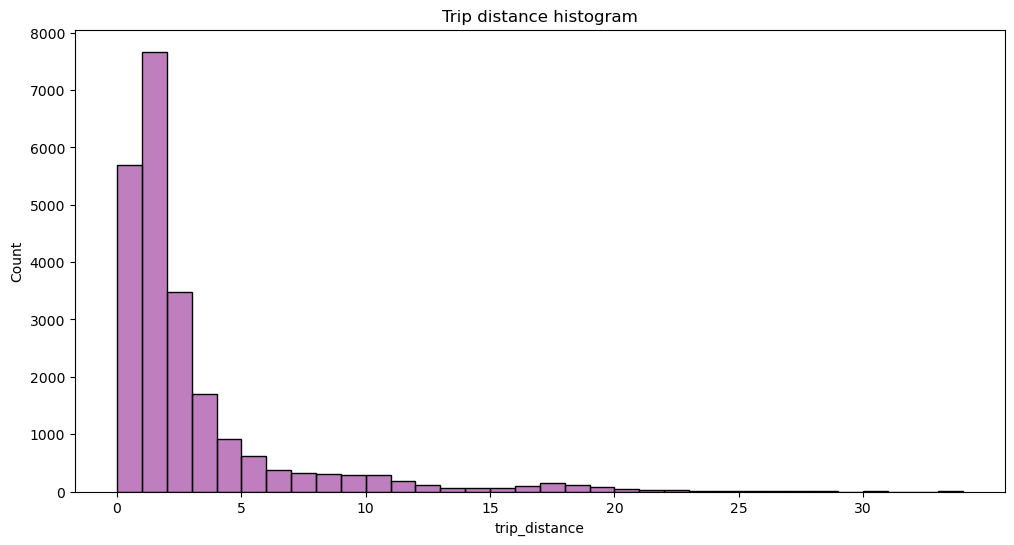

In [37]:
# Create histogram of distances
plt.figure(figsize=(12,6))
ax = sns.histplot(df1['trip_distance'], bins=range(0,35,1), color = 'purple', alpha=0.5)
ax.set_xticks(range(0,35,5))
ax.set_xticklabels(range(0,35,5))
plt.title('Trip distance histogram');

Most trips cover a short distance, with the majority falling within the 0-5 mile range. Notably, around 7500 trips range from 1 to 2 miles.

As geographic coordinates are absent from the dataset, a direct analysis of location distribution is not feasible. To gain insights into the distribution of drop-off locations, a histogram of ride counts by drop-off location will be created.

In [38]:
# Get the counts for unique pick up and drop aff locations 
pu = df1['PULocationID'].nunique()
do = df1['DOLocationID'].nunique()
print('There are ' + str(pu) + ' pickup locations, and ' + str(do) + ' drop off locations in this sample data.')

There are 152 pickup locations, and 216 drop off locations in this sample data.


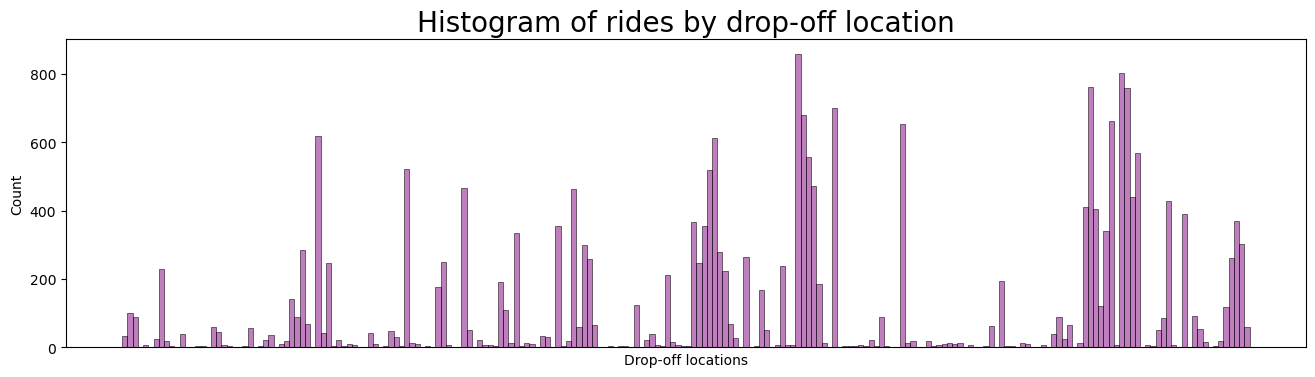

In [39]:
# DOLocationID column is numeric, so sort in ascending order
sorted_dropoffs = df1['DOLocationID'].sort_values()

# Convert to string for plot to ignore gaps in DOL location numbering
sorted_dropoffs = sorted_dropoffs.astype('str')

# Plot histogram
plt.figure(figsize=(16,4))
sns.histplot(sorted_dropoffs, bins=range(0, df1['DOLocationID'].max()+1, 1), color = 'purple', alpha=0.5)
plt.xticks([])
plt.xlabel('Drop-off locations')
plt.title('Histogram of rides by drop-off location', fontsize=20);

A clear disparity exists in drop-off distribution, as a handful of locations accumulate the bulk of taxi trips, while the vast majority of sites see minimal activity. These high-traffic areas are probably located near popular tourist attractions, airports, and train/bus stations. However, the absence of location data linked to the IDs prevents precise identification.

## Conclusion

In addition to the observations made after the initial review:

-  There are 22699 observations and 18 features within the data.  No null values.
-  The most expensive rides are not necessarily the longest ones. (Outlier identification and removal are still pending.)
-  Trip distances are concentrated heavily in the 0-5 mile range, though some stretch as far as 35 miles.
-  The average amount per trip is approximately \\$13.  The majority of trips are between \\$5 and\\$15.
-  The top two payment types are credit card and cash.  Credit Card method of payment more than doubles those that are paid with cash.  Tips are only present when the payment type is credit card.
-  Most tips range from \\$0 to \\$3, with similar tipping patterns observed between two vendors, despite differences in ride volume.
-  Tip data is only available for credit card transactions, limiting analysis. This understates overall driver income due to missing cash tip data. Tip amounts are consistent across passenger counts. Further investigation of cash tip data is needed.
-  Of the two vendors, Vendor 2 has a slightly higher share of the rides.  The average amount paid to each vendor per trip is roughly even.
-  Analysis of credit card taxi rides reveals that solo riders constitute the most frequent passenger group, and have a relatively low average fare compared to other groups. Contrary to expectations, neither tip amounts nor total fare costs correlate with the number of passengers.
-  Taxi ride patterns exhibit seasonal and weekly variations. Ride numbers are consistent throughout the year, with dips in summer and February. Revenue mirrors ride patterns with similar seasonal dips.  Taxi usage was higher on weekdays, particularly from Wednesday to Saturday.  Thursdays were the most lucrative day, generating the highest gross revenue, while Sunday and Monday brought in the least. 
-  There are 152 pickup locations, and 216 drop off locations in this sample data.  Taxi drop-offs are concentrated in a few high-traffic areas, likely near popular tourist spots and transportation hubs. However, without location data, specific identification is impossible.
-  `Total_amount` reflects the final fare paid, and `trip_distance` captures the travel length, both being primary predictors for taxi fares.
-  The dataset includes both pickup and drop-off times, allowing us to calculate trip duration. This additional metric will likely provide valuable insights for the model.
-  The presence of rides with zero passengers indicates potential data anomalies requiring further investigation.